In [ ]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['coin_Bitcoin.csv']))

Saving coin_Bitcoin.csv to coin_Bitcoin (4).csv


In [ ]:
df2 = df2.sort_values('Date')
df2.head(7)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
price = df2.Close.values.reshape(-1, 1)
price = price.astype('float32')
scaled_price = scaler.fit_transform(price)

In [ ]:
print(len(scaled_price))
print(scaled_price.shape[0])

2862
2862


In [ ]:
len_train=int(len(scaled_price)*0.8)
len_test=len(scaled_price)-len_train
train,test=scaled_price[0:len_train,:],scaled_price[len_train:len(scaled_price),:]
print(len(train),len(test))
print(len_train,len_test)

2289 573
2289 573


In [ ]:
def getsequences(data, sequence_len):
    d = []
    for index in range(len(data) - sequence_len):
        d.append(data[index: index + sequence_len])

    return np.array(d)

def getprocessedvalues(currdata, sequence_len):
    data = getsequences(currdata, sequence_len)
  
    xtrain = data[:len_train, :-1, :]
    ytrain = data[:len_train, -1, :]

    xtest = data[len_train:, :-1, :]
    ytest = data[len_train:, -1, :]

    return xtrain, ytrain, xtest, ytest

xtrain, ytrain, xtest, ytest =getprocessedvalues(scaled_price, 20)

In [ ]:
print(scaled_price[:40])
print("xtrain")
print(xtrain[:1])
print("ytrain")
print(ytrain[:1])

[[0.00132429]
 [0.0012279 ]
 [0.00084492]
 [0.00063995]
 [0.00051015]
 [0.0007668 ]
 [0.00082613]
 [0.00076332]
 [0.0007494 ]
 [0.00078535]
 [0.00076976]
 [0.00084858]
 [0.00081453]
 [0.0008103 ]
 [0.00086215]
 [0.0007494 ]
 [0.00079673]
 [0.00087572]
 [0.00094976]
 [0.00095816]
 [0.00093192]
 [0.0009321 ]
 [0.00094741]
 [0.00096496]
 [0.00101388]
 [0.00112698]
 [0.00110575]
 [0.00113185]
 [0.00106686]
 [0.0010539 ]
 [0.00111132]
 [0.0010504 ]
 [0.0010539 ]
 [0.00105912]
 [0.00093718]
 [0.00093596]
 [0.000922  ]
 [0.00092601]
 [0.0008625 ]
 [0.0007494 ]]
xtrain
[[[0.00132429]
  [0.0012279 ]
  [0.00084492]
  [0.00063995]
  [0.00051015]
  [0.0007668 ]
  [0.00082613]
  [0.00076332]
  [0.0007494 ]
  [0.00078535]
  [0.00076976]
  [0.00084858]
  [0.00081453]
  [0.0008103 ]
  [0.00086215]
  [0.0007494 ]
  [0.00079673]
  [0.00087572]
  [0.00094976]]]
ytrain
[[0.00095816]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation  

model = models.Sequential()
model.add(LSTM(30, input_shape=(20,1)))  #input_shape=(sequence_length,num of features)
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
hist=model.fit(xtrain,ytrain,epochs=200,batch_size=30, validation_data=(xtest, ytest))

Epoch 1/200
77/77 [==============================] - 3s 14ms/step - loss: 0.0043 - accuracy: 1.1148e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 2/200
77/77 [==============================] - 1s 8ms/step - loss: 1.2279e-04 - accuracy: 1.6825e-05 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 3/200
77/77 [==============================] - 1s 9ms/step - loss: 1.1983e-04 - accuracy: 0.0011 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 4/200
77/77 [==============================] - 1s 8ms/step - loss: 9.3879e-05 - accuracy: 4.4841e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 5/200
77/77 [==============================] - 1s 8ms/step - loss: 8.8815e-05 - accuracy: 9.4994e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 6/200
77/77 [==============================] - 1s 8ms/step - loss: 1.0201e-04 - accuracy: 7.8526e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 7/200
77/77 [==============================] - 1s 8ms/step - loss: 8.2011e-05 - acc

In [ ]:
model.evaluate(xtest,ytest)

18/18 [==============================] - 0s 4ms/step - loss: 3.5750e-04 - accuracy: 0.0000e+00


[0.00035749940434470773, 0.0]

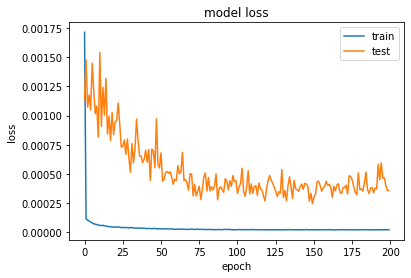

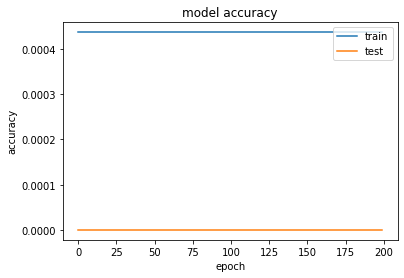

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


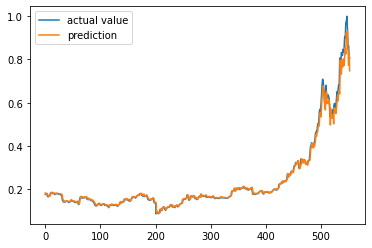

In [ ]:
ypred=model.predict(xtest)
plt.plot(ytest,label='actual value')
plt.plot(ypred,label='prediction')
plt.legend()
plt.show()